In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,recall_score
from sklearn.metrics import precision_score, roc_auc_score,classification_report

In [2]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_excel("Bankruptcy_data(1).xlsx")
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [4]:
df.tail(2)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0
92871,-0.648028,-0.036524,-0.219774,-0.144842,0.693342,0.222476,-0.651048,-0.498483,55.624410,-0.063630,0.064574,0.062500,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


##### As we can see all the columns in the data are of numerical data type . The target column by default is encoded.

# Descriptive Statisitcs

#### a) Numerical columns

In [6]:
df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


#### b) Categorical column

In [7]:
df['BK'].astype('object').describe()

count     92872
unique        2
top           0
freq      92314
Name: BK, dtype: int64

# Null Values

In [8]:
(df.isnull().sum()/len(df))*100

EPS                   0.005384
Liquidity             0.265957
Profitability         0.265957
Productivity          0.265957
Leverage Ratio        0.027996
Asset Turnover        0.265957
Operational Margin    5.983504
Return on Equity      0.008614
Market Book Ratio     0.061375
Assets Growth         7.215307
Sales Growth          7.215307
Employee Growth       7.548023
BK                    0.000000
dtype: float64

- The column with the highest % of null values is Employee growth.
- Since the propotion of null values is less we can directly impute them with the Median
- By using median we reduce the impact of the outliers while imputing null values

In [9]:
#replace na with median values of the column
nan_cols = df.columns[df.isna().any()].tolist()
for col in nan_cols:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True)

In [10]:
#to check if all the missing values are replaced in every column
df.isnull().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

# Outlier Treatment

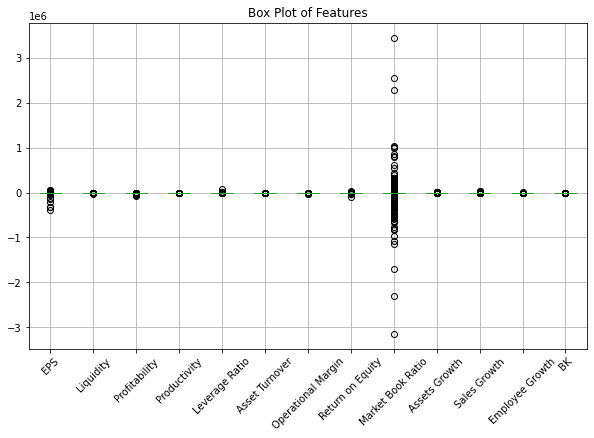

In [11]:
# Create box plots for each column
#market book ratio wide range of outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Features')
plt.show()

#### As we can see we have huge outliers for the column market book ratio and all the other columns have a very little outliers which are closer to the actual distribution of the data.

#### Instead of deleting the rows which have outliers from any of the columns we can remove the rows which have outliers in the market book ratio,EPS columns.

#### This is becaus of the imbalance in the target column 'BK'. If we remove the outliers based on all the columns we end up with just 35000 rows which has no Class 1 in the target column.

In [12]:
df_inde = df.drop('BK',axis=1)
df_inde.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.051844,0.059733,0.017241
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030


In [13]:
# calculate the first quartile
Q1 = df[['EPS','Market Book Ratio']].quantile(0.25)

# calculate the third quartile
Q3 = df[['EPS','Market Book Ratio']].quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df = df[~((df[['EPS','Market Book Ratio']] < (Q1 - 1.5 * IQR)) | (df[['EPS','Market Book Ratio']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df.shape

(70187, 13)

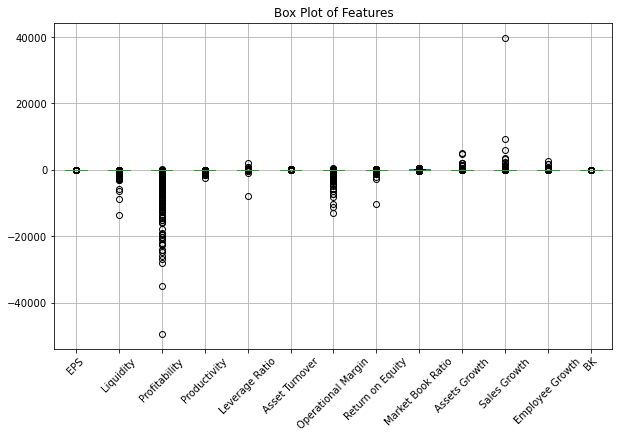

In [14]:
# Create box plots for each column
#market book ratio wide range of outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Features')
plt.show()

- As we can see we have removed huge outliers from the data. Now we only have 70187 rows out of 92872 rows.
- It is not mandatory to always remove outliers unless and untill they are huge and have a big impact on the model predictions. 

# Pre-Processing

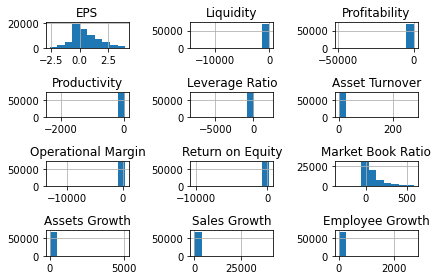

Skewness:


EPS                     0.490644
Liquidity            -101.021418
Profitability         -43.808866
Productivity          -66.397468
Leverage Ratio       -210.203375
Asset Turnover         68.766098
Operational Margin    -63.099190
Return on Equity     -219.546424
Market Book Ratio       1.391136
Assets Growth         117.388809
Sales Growth          231.771213
Employee Growth       125.655050
dtype: float64

In [15]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df.drop('BK',axis=1).hist()

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df.drop('BK',axis=1).skew()

#### As we can see there is high amount of skew in the data and this will impact our model. So we perform Power transformation

#### Since there are negative values and 0's in the data we perform Yeo-Johnson and not Box-Cox.

In [16]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(df.drop('BK',axis=1)),columns=df.drop('BK',axis=1).columns)

In [17]:
df_transformed.skew()

EPS                    -0.049279
Liquidity               0.342263
Profitability         103.651145
Productivity           67.887784
Leverage Ratio          4.782457
Asset Turnover          0.010458
Operational Margin     75.793226
Return on Equity       19.254445
Market Book Ratio       0.568693
Assets Growth          -0.845778
Sales Growth          -83.861206
Employee Growth        -1.052832
dtype: float64

- We can see even after performing Yeo-Johnson transformation we can see the skew is still high.
- So we first perform square transformation and then perform Yeo-Johnson.

In [18]:
df_power = np.square(df.drop('BK',axis=1))
df_power.skew()

EPS                     2.463728
Liquidity             203.489248
Profitability         109.104368
Productivity          144.191865
Leverage Ratio        262.448548
Asset Turnover        136.278728
Operational Margin    120.914358
Return on Equity      262.583922
Market Book Ratio       3.120343
Assets Growth         173.735002
Sales Growth          263.544804
Employee Growth       199.022876
dtype: float64

In [19]:
df_squar_transformed = pd.DataFrame(pt.fit_transform(df_power),columns=df_power.columns)
df_squar_transformed.skew()

EPS                   0.363125
Liquidity             1.124748
Profitability         1.243172
Productivity          2.221084
Leverage Ratio        0.776574
Asset Turnover        0.221919
Operational Margin    2.286360
Return on Equity      2.134120
Market Book Ratio    -0.054754
Assets Growth         1.528177
Sales Growth          1.517662
Employee Growth       1.590841
dtype: float64

#### Now the skew is drastically reduced and is around 0 for all the columns.

In [20]:
df = pd.concat([df_squar_transformed.reset_index(drop=True),df['BK'].reset_index(drop=True)],axis=1)
df.columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [21]:
df.shape

(70187, 13)

# Visualization

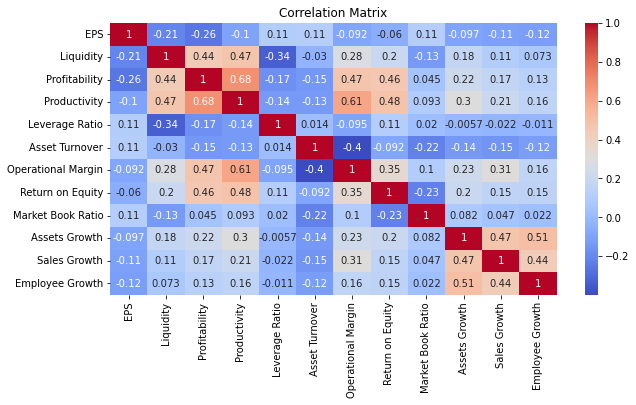

In [22]:
#correlation
correlation_matrix = df.drop(['BK'],axis=1).corr()
plt.figure(figsize=(10, 5))  # Set the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Based on this we can understand there is a positive corelation > 0.5 between Productivity and Profitability, 
  Operational margin and Productivity. 
- More the productivity more the operational margin. More the productivity higher the profitability

In [23]:
df['BK'].value_counts(normalize=True)

0    0.994287
1    0.005713
Name: BK, dtype: float64

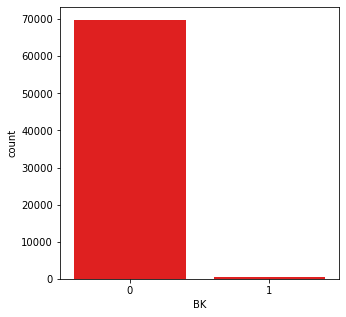

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(data= df,x='BK',color='red')
plt.show()

- Based on the above visualization we can clearly that there is a huge imbalance in the target column of the data.

# Train test split

In [25]:
X = df.drop('BK',axis=1)
y =  df['BK']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Resorting Imbalance data

- Now, the reason we should resort the imbalance is because if one class is represented highly the model will learn that class really well and will predict that class with high accuracy. 
- On the other side since the class 2 is learnt very badly the models' perfomance will be really poor for class 2.
- But for us to have good model the model should be as generalized as possible which means the model should perform equally on both the classes incase of binary classification like the problem we have in hand.

- To resort imbalance we can do oversampling and undersampling.

In [27]:
train_data = pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
train_data.shape

(56149, 13)

### a) Undersampling

First we reduce the number of data points with the class that is highly represented.

In [28]:
class_0 = train_data[train_data['BK']==0].sample(frac=0.5,replace=False)
class_0.head(1)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
52404,-1.111128,2.136139,1.551769,0.352585,-0.890637,-1.359512,-0.488091,-0.534386,1.18648,-0.663799,-0.660081,-0.664661,0


In [29]:
df_undersampled = pd.concat([class_0,train_data[train_data['BK']==1]],axis=0).reset_index(drop=True)
df_undersampled.shape

(28230, 13)

In [30]:
X_train = df_undersampled.drop('BK',axis=1)
y_train = df_undersampled['BK']

### b) Oversampling

In [31]:
# Apply SMOTE oversampling to the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_train,y_train = smote.fit_resample(X_train,y_train)

In [32]:
X_train.shape

(55836, 12)

(array([27918.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 27918.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

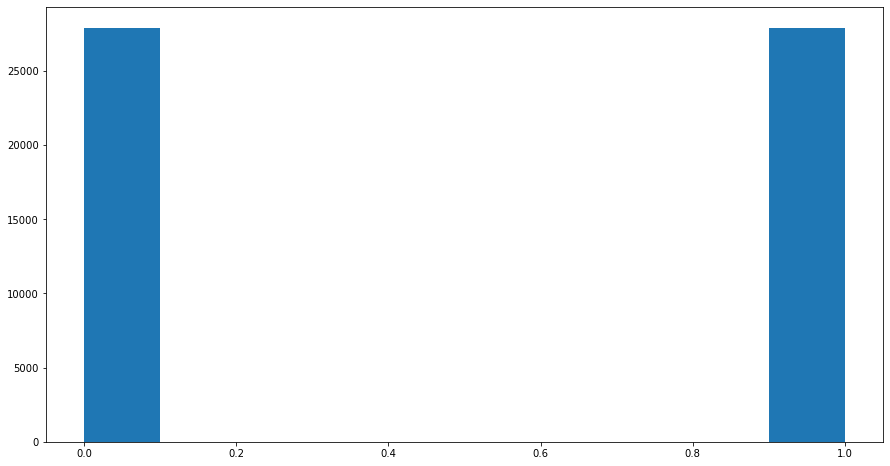

In [33]:
plt.hist(y_train)

In [34]:
y_train.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: BK, dtype: float64

- Now we have enough balance in the data of ratio 1:1. 


# Model Building

## a) Random Forest Classifier

- Random forests are a powerful ensemble learning method that combines multiple decision trees to make predictions. They are effective at handling both regression and classification tasks.
- Random forests can handle a variety of data types, including numerical and categorical features, making them suitable for diverse datasets.

In [36]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 100)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

### Metrics

In [37]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)
    y_pred=pd.DataFrame(test_pred)
    print(y_pred.value_counts())

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [38]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

0    13775
1      263
dtype: int64
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13949
           1       0.09      0.26      0.13        89

    accuracy                           0.98     14038
   macro avg       0.54      0.62      0.56     14038
weighted avg       0.99      0.98      0.98     14038



### Tuning Hyperparameters using GridSearchCV

In [39]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 50],
                     'max_depth': [10, 20],
                     'min_samples_split': [2, 10],
                     'min_samples_leaf': [1, 9],
                     'max_leaf_nodes': [2, 8]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 100)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 



In [40]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 100)
 
# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

0    10817
1     3221
dtype: int64
Classification Report for test set:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87     13949
           1       0.02      0.84      0.05        89

    accuracy                           0.77     14038
   macro avg       0.51      0.81      0.46     14038
weighted avg       0.99      0.77      0.87     14038



## b) Logistic Regression

In [41]:
#Logistic regression is a widely used statistical modeling technique for binary classification problems.
#Logistic regression models the probability of a binary outcome based on the input features, making it suitable for predicting binary outcomes like the "BK" variable in the provided dataset.

In [42]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.01)
log_model = log.fit(X_train,y_train)

In [43]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(log_model)

# print the performace measures
print(test_report) 

0    11520
1     2518
dtype: int64
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     13949
           1       0.03      0.82      0.06        89

    accuracy                           0.82     14038
   macro avg       0.51      0.82      0.48     14038
weighted avg       0.99      0.82      0.90     14038



In [44]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [45]:
# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(best_model))

0    11484
1     2554
dtype: int64
Classification Report for test set:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90     13949
           1       0.03      0.82      0.06        89

    accuracy                           0.82     14038
   macro avg       0.51      0.82      0.48     14038
weighted avg       0.99      0.82      0.90     14038



# Things that can be done to improve the model if time permits.

## a) Metric based improvement
- First we should check the confusion matrix for the model built.
- We have 1(BK positive) as going bankrupt and 0(BK negative) as not going bankrupt.


##### Based on the False Positives and False negatives:
- When our model predicts that the company might go bankrupt(Predicted Postive) and the company doesn't(Actual Negative) the loss incurred isn't huge.(False Postive)
- But when a corporate will go bankrupt(Actual Positive) but our model has predicted that it wont(Predicted Negative) the loss incurred is huge.(False Negative)

- So we should ensure there are less False Negatives. 

- This brings us to the metric Recall score = True Positive/ (True Positive + False Negative)
- We should try and tune our model in such a way that the recall score is as good as possible than any other metric.

## b) Model based improvement
We can try building other ensembling models like Naive Bayes, SVM, Stacking classifier as well to check if they are better suited for our problem in hand.

## c) Feature based improvement
We can try and use feature selection methods to remove the columns that do not contribute much to the target column and then build models.